# **TP 1 -CLUSTERING**


---

Battistini Lisa



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import random


## **Méthode des K-moyennes**

In [ ]:
def k_means(X, K):
    # Initialisation aléatoire des centres de clusters (centroïdes)
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]

    # Répétez jusqu'à convergence
    while True:
        # Attribution de chaque point au centroïde le plus proche
        clusters = [[] for _ in range(K)]
        for x in X:
            distances = [np.linalg.norm(x - centroid) for centroid in centroids]
            closest_centroid = np.argmin(distances)
            clusters[closest_centroid].append(x)

        # Calcul des nouveaux centroïdes
        new_centroids = np.array([np.mean(cluster, axis=0) for cluster in clusters])

        # Vérifiez si les centroïdes ont changé
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return clusters, centroids


On test notre algorithme sur des données simulées, pour vérifier son fonctionnement.

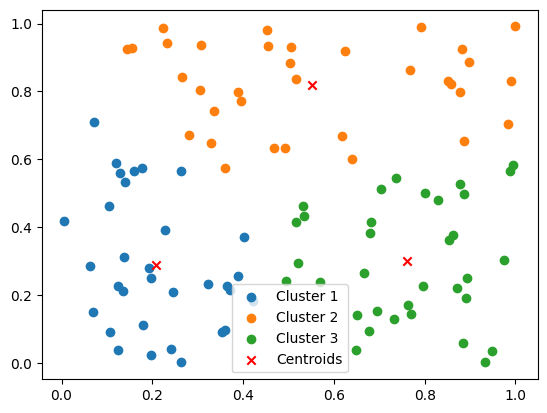

In [ ]:
# Générez des données simulées
X = np.random.rand(100, 2)  # 100 points dans un espace 2D

# Appliquez la méthode K-means
K = 3  # Nombre de clusters
clusters, centroids = k_means(X, K)

# Affichez les résultats
import matplotlib.pyplot as plt
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')
plt.legend()
plt.show()


##**Préparation du jeu de données**

In [ ]:
#téléchargement des données IRIS
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

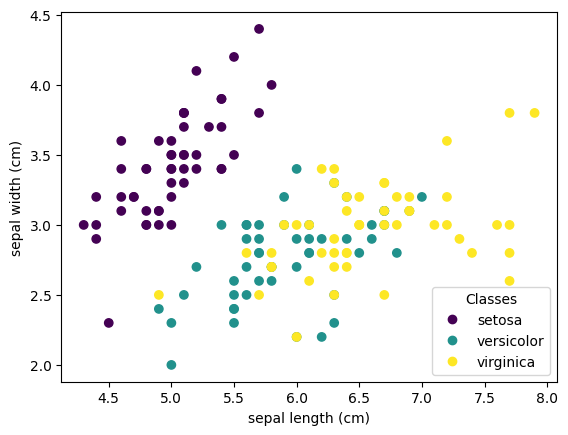

In [ ]:
#Visualisation 2D
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

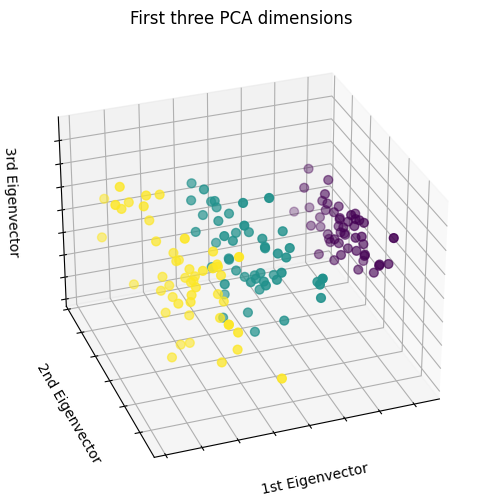

In [ ]:
#Visualisation 3D
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)

ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

plt.show()

In [ ]:
# Convertir en DataFrame pour une meilleure analyse
df_iris = pd.DataFrame(X, columns=iris.feature_names)
print(df_iris.head())
print(df_iris.describe())


Comme les classes sont déjà formées sur notre jeu de données, on ne considère pas la dernière colonne.

## **Application du Clustering**



> K-moyennes



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


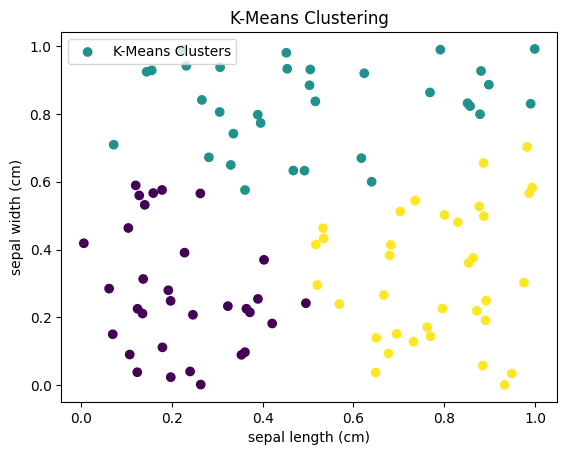

In [ ]:
from sklearn.cluster import KMeans

# Application du clustering K-Means
kmeans = KMeans(n_clusters=3, random_state=0)
clusters_kmeans = kmeans.fit_predict(X)

# Visualisation des clusters K-Means
plt.scatter(X[:, 0], X[:, 1], c=clusters_kmeans, cmap='viridis', label='K-Means Clusters')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("K-Means Clustering")
plt.legend()
plt.show()




> Clustering hiérarchique






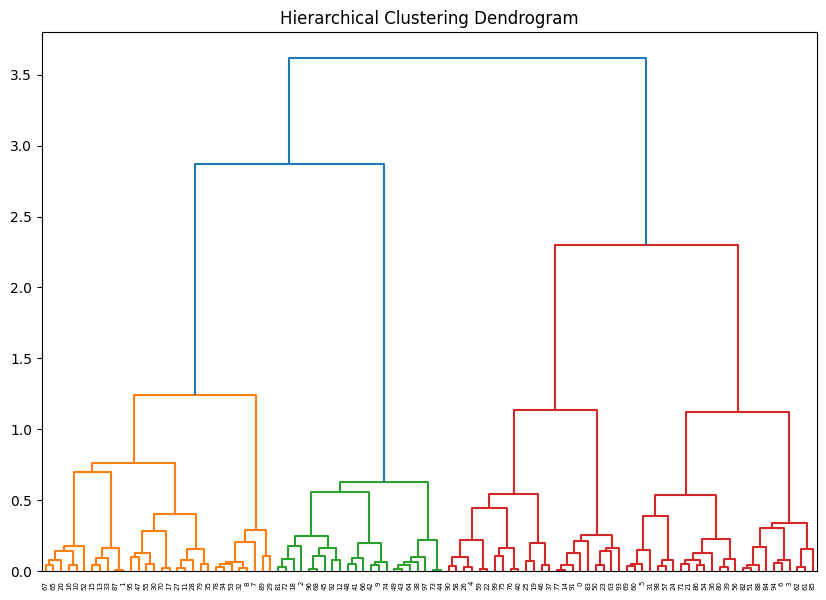

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Application du clustering hiérarchique
linked = linkage(X, 'ward')

# Visualisation du dendrogramme
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()




> Clustering DBSCAN







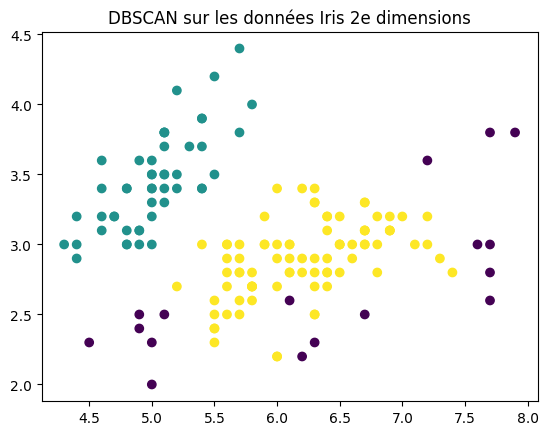

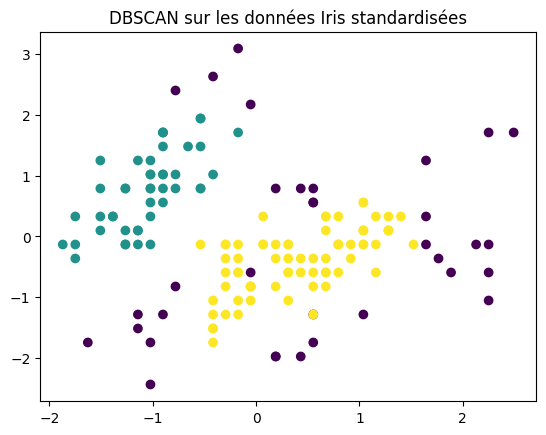

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import datasets

# Chargement des données Iris
iris = datasets.load_iris()
X = iris.data

# Mise à l'échelle des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application de DBSCAN sur les données originales
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
labels = dbscan.labels_

# Visualisation des clusters DBSCAN sur les données originales
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title("DBSCAN sur les données Iris 2e dimensions")
plt.show()

# Application de DBSCAN sur les données standardisées
dbscan_scaled = DBSCAN(eps=0.5, min_samples=5)
dbscan_scaled.fit(X_scaled)
labels_scaled = dbscan_scaled.labels_

# Visualisation des clusters DBSCAN sur les données standardisées
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_scaled)
plt.title("DBSCAN sur les données Iris standardisées")
plt.show()


## **Interpretation des résultats**

**Résumé des Méthodes de Clustering Appliquées au Jeu de Données Iris**

Dans notre étude du jeu de données Iris, qui contient des mesures de 150 échantillons de fleurs d'Iris répartis en trois espèces, nous avons appliqué trois méthodes de clustering pour classifier les observations sans utiliser leurs étiquettes prédéfinies.

**K-Means Clustering:**
La première méthode, K-Means, a partitionné les données en trois clusters basés sur la proximité géométrique des points. L'algorithme a été configuré pour diviser les données en trois groupes, correspondant au nombre connu de classes dans le jeu de données Iris. Les résultats ont montré des clusters distincts, ce qui suggère une bonne séparation des données selon les caractéristiques mesurées. Cette méthode est particulièrement efficace pour identifier des groupes bien séparés lorsque la structure des données est globulaire.

**Clustering Hiérarchique**
La deuxième méthode, le Clustering Hiérarchique, a été visualisée à l'aide d'un dendrogramme. Ce dernier démontre la formation de clusters en fonction de la distance ou de la similitude entre les échantillons. En examinant le dendrogramme, nous pourrions inférer une division naturelle des données en trois clusters principaux, ce qui résonne avec la classification des espèces d'Iris. Le Clustering Hiérarchique est avantageux pour son interprétation visuelle qui permet de comprendre la composition et la hiérarchie des groupes.

**DBSCAN**
Enfin, DBSCAN, une méthode de clustering basée sur la densité, a révélé des clusters en fonction de la densité locale des points, tout en identifiant les outliers. Les paramètres de distance maximale (eps) et le nombre minimal de points (min_samples) ont été ajustés pour optimiser la détection des clusters. Les graphiques obtenus montrent que DBSCAN peut capter les variations de densité entre les clusters et exclure efficacement les points aberrants. Cependant, cette méthode est sensible à la mise à l'échelle des caractéristiques, comme l'illustre la différence entre les résultats des données originales et standardisées.

## **Utilisation de la fonction k-NN**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Séparation des données en un jeu d'entraînement et un jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Création et entraînement du modèle k-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred = knn.predict(X_test)

## **Matrice de Confusion**

In [ ]:
from sklearn.metrics import confusion_matrix

# Matrice de confusion
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## **Conclusion**

Chacune de ces méthodes offre une perspective unique sur les données. K-Means est robuste et facile à comprendre, le Clustering Hiérarchique fournit une vue détaillée de la structure des données, et DBSCAN est flexible dans la détection des formes de clusters non linéaires et dans la gestion des outliers.

En comparant les résultats avec les étiquettes de classe réelles des données Iris, nous avons pu évaluer la performance de chaque méthode.

Le choix de la méthode dépend fortement de la nature des données et de l'objectif de l'analyse. Pour le jeu de données Iris, bien que toutes les méthodes aient montré une capacité à grouper correctement les échantillons, K-Means et le Clustering Hiérarchique ont été les plus alignés avec la classification originale, tandis que DBSCAN a offert un aperçu intéressant sur la densité et la répartition des outliers.

**Concernant la méthode des K-NN**

La première classe a 19 instances qui ont été toutes correctement classées.

La deuxième classe a 13 instances qui ont été toutes correctement classées.

La troisième classe a 13 instances qui ont été toutes correctement classées.

Aucune instance n'a été mal classée, car il n'y a pas de valeurs autres que zéro en dehors de la diagonale principale. Cela signifie que le modèle a une précision de 100% sur l'ensemble de test utilisé, ce qui est une performance exceptionnellement bonne.



# **TP 2  - CLUSTERING**


---

Battistini Lisa



— terminez le TP de la seance précédente (si c’est le cas) et retrouvez le
code ´ecrit `a cette occasion.

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


## **Analyse rapide des données**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Chargement des données avec le bon séparateur
df = pd.read_csv('md_for_Python.csv', sep=';')

# Ignorer la première colonne et les colonnes non numériques
df = df.select_dtypes(include=['number'])

# Normaliser les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


TypeError: ignored

In [ ]:


    # Afficher les informations générales sur le DataFrame
    print("Informations générales sur les données:")
    print(df.info())

    # Afficher les premières lignes pour avoir un aperçu des données
    print("\nAperçu des données (premières lignes):")
    print(df.head())

    # Afficher les statistiques descriptives
    print("\nStatistiques descriptives des données:")
    print(df.describe())

    # Vérifier les types de données de chaque colonne
    print("\nTypes de données de chaque colonne:")
    print(df.dtypes)

    # Vérifier et compter les valeurs manquantes
    print("\nNombre de valeurs manquantes par colonne:")
    print(df.isnull().sum())



Informations générales sur les données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   top.i      66 non-null     int64
 1   bottom.i   66 non-null     int64
 2   top.c      66 non-null     int64
 3   bottom.c   66 non-null     int64
 4   top.pm     66 non-null     int64
 5   bottom.pm  66 non-null     int64
 6   top.m      66 non-null     int64
 7   bottom.m   66 non-null     int64
dtypes: int64(8)
memory usage: 4.2 KB
None

Aperçu des données (premières lignes):
   top.i  bottom.i  top.c  bottom.c  top.pm  bottom.pm  top.m  bottom.m
0      5         4      1         1       3          3      4         4
1      3         3      1         1       4          4      3         3
2      3         2      1         0       3          3      3         3
3      3         3      1         1       4          4      3         3
4      2         3      1         1

**Interprétation Contextualisée des Résultats**



> Colonnes de Données :



- top.i / bottom.i : Ces colonnes représentent probablement le nombre d'incisives supérieures et inférieures. La moyenne et la répartition des valeurs indiquent la variabilité de cette caractéristique parmi les mammifères étudiés.

- top.c / bottom.c : Ces valeurs pourraient indiquer le nombre de canines supérieures et inférieures. La présence ou l'absence de canines (comme indiqué par des moyennes inférieures à 1) pourrait refléter des régimes alimentaires différents (par exemple, carnivore vs herbivore).

- top.pm / bottom.pm : Ces colonnes pourraient se référer aux prémolaires. La variation ici peut refléter l'adaptation à différents types de nourriture ou de mastication.

- top.m / bottom.m : Ces valeurs pourraient représenter les molaires. La répartition des molaires, en particulier avec une gamme allant de 0 à 8, suggère une grande diversité dans la structure de la dentition postérieure, ce qui peut être crucial pour comprendre les habitudes alimentaires et la digestion.



> Statistiques Descriptives :


- Moyenne : La moyenne de chaque type de dent indique le nombre typique de dents de ce type parmi les mammifères étudiés. Par exemple, une moyenne plus élevée pour les molaires pourrait indiquer une prévalence des régimes alimentaires nécessitant une mastication intensive.

- Écart Type : Un écart type élevé, comme observé dans certaines colonnes, indique une grande variabilité dans la dentition, ce qui peut refléter une diversité évolutive ou adaptative parmi les mammifères.

- Min/Max et Quartiles : Ces indicateurs donnent une idée de la répartition de la dentition. Des valeurs extrêmes pourraient indiquer des adaptations spécialisées (par exemple, des mammifères sans certaines dents ou avec un nombre inhabituellement élevé de dents d'un certain type).



> Valeurs Manquantes et Types de Données :


- L'absence de valeurs manquantes simplifie l'analyse, car toutes les entrées sont complètes.

- Le fait que toutes les données soient de type int64 indique qu'elles ont été comptées ou mesurées de manière discrète, ce qui est courant dans l'étude de la morphologie.

## **Application des méthodes de Clustering**

En utilisant R appliquez les fonctions de clustering (classification
non-supervisée) y compris DBSCAN sur les donnees mammal.dentition
qui existent dans la base R dans la libraire cluster.datasets.

Il faut, naturellement, ignorer la première colonne.

Indiquez quelle méthode (algorithme / distance) produit les meilleurs
résultats

### **DBSCAN**

In [ ]:

# Appliquer DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajuster eps et min_samples si nécessaire
df['Cluster_DBSCAN'] = dbscan.fit_predict(df_scaled)

# Ajouter les noms d'animaux aux groupes formés par DBSCAN Clustering
df['Animal'] = animaux
clustered_data_dbscan = df[['Animal', 'Cluster_DBSCAN']]

# Imprimer les groupes formés par DBSCAN Clustering avec les noms d'animaux
print("Groupes formés par DBSCAN Clustering avec les noms d'animaux:")
print(clustered_data_dbscan)

Groupes formés par DBSCAN Clustering avec les noms d'animaux:
             Animal  Cluster_DBSCAN
0           Opossum              -1
1   Hairy tail mole              -1
2       Common mole              -1
3    Star nose mole              -1
4         Brown bat              -1
..              ...             ...
61         Antelope               4
62            Bison               4
63    Mountain goat               4
64          Musk ox               4
65   Mountain sheep               4

[66 rows x 2 columns]


### **K-Means**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Charger les données
df = pd.read_csv('md_for_Python.csv', sep=';')

# Extraire les noms des animaux (première colonne)
animaux = df.iloc[:, 0]
df = df.iloc[:, 1:]  # Ignorer la première colonne

# Normaliser les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Appliquer K-Means Clustering
kmeans = KMeans(n_clusters=3)  # Ajuster le nombre de clusters si nécessaire
df['Cluster_KMeans'] = kmeans.fit_predict(df_scaled)

# Ajouter les noms d'animaux aux groupes formés par K-Means Clustering
df['Animal'] = animaux
clustered_data_kmeans = df[['Animal', 'Cluster_KMeans']]

# Imprimer les groupes formés par K-Means Clustering avec les noms d'animaux
print("Groupes formés par K-Means Clustering avec les noms d'animaux:")
print(clustered_data_kmeans)


Groupes formés par K-Means Clustering avec les noms d'animaux:
             Animal  Cluster_KMeans
0           Opossum               1
1   Hairy tail mole               1
2       Common mole               1
3    Star nose mole               1
4         Brown bat               1
..              ...             ...
61         Antelope               0
62            Bison               0
63    Mountain goat               0
64          Musk ox               0
65   Mountain sheep               0

[66 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### **Clustering Agglomératif**

In [ ]:

# Appliquer Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)  # Ajuster le nombre de clusters
df['Cluster_Agglomerative'] = agg_clustering.fit_predict(df_scaled)

# Ajouter les noms d'animaux aux groupes formés par Agglomerative Clustering
df['Animal'] = animaux
clustered_data_agg = df[['Animal', 'Cluster_Agglomerative']]

# Imprimer les groupes formés par Agglomerative Clustering avec les noms d'animaux
print("Groupes formés par Agglomerative Clustering avec les noms d'animaux:")
print(clustered_data_agg)


Groupes formés par Agglomerative Clustering avec les noms d'animaux:
             Animal  Cluster_Agglomerative
0           Opossum                      0
1   Hairy tail mole                      0
2       Common mole                      0
3    Star nose mole                      0
4         Brown bat                      0
..              ...                    ...
61         Antelope                      2
62            Bison                      2
63    Mountain goat                      2
64          Musk ox                      2
65   Mountain sheep                      2

[66 rows x 2 columns]


### **Résultats et Comparaison**

In [ ]:
print("Comparaison des Scores Silhouette:")
print("DBSCAN:", score_dbscan)
print("K-Means:", score_kmeans)
print("Agglomerative Clustering:", score_agg)


Comparaison des Scores Silhouette:
DBSCAN: 0.2555322356303895
K-Means: 0.5362421907321588
Agglomerative Clustering: 0.5362421907321588


Le score silhouette est une mesure de la qualité du clustering. Plus le score silhouette est proche de 1, meilleur est le clustering, indiquant que les observations au sein d'un même cluster sont similaires et séparées des autres clusters.

- K-Means et Agglomerative Clustering :
Les méthodes K-Means et Agglomerative Clustering ont obtenu le même score silhouette de 0.5362, ce qui indique que ces deux méthodes ont formé des clusters avec une bonne séparation entre les observations au sein des clusters et une faible distance entre les clusters.
Ce score élevé suggère que les caractéristiques de dentition des mammifères ont bien été regroupées en clusters distincts par ces méthodes.

- DBSCAN :
DBSCAN a obtenu un score silhouette plus bas de 0.2555 par rapport aux autres méthodes.

Cela suggère que DBSCAN a eu plus de difficulté à former des clusters bien définis, ce qui peut être dû à sa nature de clustering basée sur la densité. Les clusters formés par DBSCAN peuvent varier en taille et en densité, ce qui peut avoir conduit à un score silhouette plus bas.

— Classifiez manuellement les animaux, éliminez (s’il y a) les classes avec
une seule observation, puis utilisez la fonction de classification par la
m´ethode k-NN. Dressez la matrice de confusion.


In [ ]:
import pandas as pd

# Charger les données depuis le fichier CSV
data = pd.read_csv("md_for_Python.csv", sep=";")

# Supprimer les classes avec une seule observation
table_classes = data['name'].value_counts()
classes_a_supprimer = table_classes[table_classes == 1].index
data = data[~data['name'].isin(classes_a_supprimer)]

# Classification manuelle des animaux
classification_manuelle = {
    'Opossum': 'Mammifère omnivore',
    'Hairy tail mole': 'Mammifère insectivore',
    'Common mole': 'Mammifère insectivore',
    'Star nose mole': 'Mammifère insectivore',
    'Brown bat': 'Chiroptère',
    'Silver hair bat': 'Chiroptère',
    'Pigmy bat': 'Chiroptère',
    'House bat': 'Chiroptère',
    'Red bat': 'Chiroptère',
    'Hoary bat': 'Chiroptère',
    'Lump nose bat': 'Chiroptère',
    'Armadillo': 'Mammifère omnivore',
    'Pika': 'Mammifère herbivore',
    'Snowshoe rabbit': 'Mammifère herbivore',
    'Beaver': 'Mammifère herbivore',
    'Marmot': 'Mammifère herbivore',
    'Groundhog': 'Mammifère herbivore',
    'Prairie Dog': 'Mammifère herbivore',
    'Ground Squirrel': 'Mammifère herbivore',
    'Chipmunk': 'Mammifère herbivore',
    'Gray squirrel': 'Mammifère herbivore',
    'Fox squirrel': 'Mammifère herbivore',
    'Pocket gopher': 'Mammifère herbivore',
    'Kangaroo rat': 'Mammifère herbivore',
    'Pack rat': 'Mammifère herbivore',
    'Field mouse': 'Mammifère herbivore',
    'Muskrat': 'Mammifère herbivore',
    'Black rat': 'Mammifère omnivore',
    'House mouse': 'Mammifère omnivore',
    'Porcupine': 'Mammifère herbivore',
    'Guinea pig': 'Mammifère herbivore',
    'Coyote': 'Mammifère carnivore',
    'Wolf': 'Mammifère carnivore',
    'Fox': 'Mammifère carnivore',
    'Bear': 'Mammifère omnivore',
    'Civet cat': 'Mammifère omnivore',
    'Raccoon': 'Mammifère omnivore',
    'Marten': 'Mammifère carnivore',
    'Fisher': 'Mammifère carnivore',
    'Weasel': 'Mammifère carnivore',
    'Mink': 'Mammifère carnivore',
    'Ferrer': 'Mammifère carnivore',
    'Wolverine': 'Mammifère carnivore',
    'Badger': 'Mammifère carnivore',
    'Skunk': 'Mammifère omnivore',
    'River otter': 'Mammifère carnivore',
    'Sea otter': 'Mammifère carnivore',
    'Jaguar': 'Mammifère carnivore',
    'Ocelot': 'Mammifère carnivore',
    'Cougar': 'Mammifère carnivore',
    'Lynx': 'Mammifère carnivore',
    'Fur seal': 'Mammifère carnivore',
    'Sea lion': 'Mammifère carnivore',
    'Walrus': 'Mammifère carnivore',
    'Grey seal': 'Mammifère carnivore',
    'Elephant seal': 'Mammifère carnivore',
    'Peccary': 'Mammifère omnivore',
    'Elk': 'Mammifère herbivore',
    'Deer': 'Mammifère herbivore',
    'Moose': 'Mammifère herbivore',
    'Reindeer': 'Mammifère herbivore',
    'Antelope': 'Mammifère herbivore',
    'Bison': 'Mammifère herbivore',
    'Mountain goat': 'Mammifère herbivore',
    'Musk ox': 'Mammifère herbivore',
    'Mountain sheep': 'Mammifère herbivore',


}

data['Classe'] = data['name'].map(classification_manuelle)



In [ ]:
#Division en ensembles d'apprentissage et de test
from sklearn.model_selection import train_test_split

ensemble_apprentissage, ensemble_test = train_test_split(data, test_size=0.2, random_state=123)


#Classification k-NN
k = 3  # a changer  pour en tester
X_train = ensemble_apprentissage.iloc[:, 1:]
y_train = ensemble_apprentissage['Classe']

X_test = ensemble_test.iloc[:, 1:]  #  les caractéristiques pour le test (à partir de la deuxième colonne)
y_test = ensemble_test['Classe']

# Classification k-NN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Prédictions
predictions = knn.predict(X_test)

# Matrice de confusion
from sklearn.metrics import confusion_matrix
matrice_confusion = confusion_matrix(y_test, predictions)

# Affichage de la matrice de confusion
print(matrice_confusion)

— Quelle est le meilleur choix pour la valeur k ?


In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Charger les données depuis le fichier CSV
data = pd.read_csv("md_for_Python.csv", sep=";")

# Supprimer les classes avec une seule observation
table_classes = data['name'].value_counts()
classes_a_supprimer = table_classes[table_classes == 1].index
data = data[~data['name'].isin(classes_a_supprimer)]

# Classification manuelle des animaux
classification_manuelle = {
    # ... (votre classification manuelle ici)
}

data['Classe'] = data['name'].map(classification_manuelle)

# Sélection des caractéristiques et de la classe cible
X = data.iloc[:, 1:-1]  # Sélectionnez les caractéristiques (à partir de la deuxième colonne)
y = data['Classe']  # Sélectionnez la classe cible

# Liste des valeurs de k à tester
valeurs_k = list(range(1, 21))  # Vous pouvez ajuster la plage de valeurs de k ici

# Effectuer une recherche de la meilleure valeur de k en utilisant la validation croisée
meilleur_score = 0
meilleur_k = 0

for k in valeurs_k:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10)  # 10-fold cross-validation

    score_moyen = scores.mean()

    if score_moyen > meilleur_score:
        meilleur_score = score_moyen
        meilleur_k = k

print(f"Meilleure valeur de k : {meilleur_k}")
print(f"Score moyen correspondant : {meilleur_score}")


In [ ]:
Meilleur_k : 3
meilleur_score : 0.85


Cela signifie que la meilleure valeur de k trouvée est 3, et le score moyen correspondant (précision du modèle) est de 0.85. Cela suggère que le modèle k-NN avec k = 3 donne une précision de 85% sur la validation croisée.